<a href="https://colab.research.google.com/github/NandhanaRameshkumar/Sales-Prediction-System/blob/main/Sales_Prediction_System.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install pandas scikit-learn xgboost matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.9/190.9 MB 4.4 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torch 2.3.1+cu121 requires nvidia-cublas-cu12==12.1.3.1; platform_system == "Linux" and platform_machine == "x86_64", which is not installed.
torch 2.3.1+cu121 requires nvidia-cuda-cupti-cu12==12.1.105; platform_system == "Linux" and platform_machine == "x86_64", which is not installed.
torch 2.3.1+cu121 requires nvidia-cuda-nvrtc-cu12==12.1.105; platform_system == "Linux" and platform_machine == "x86_64", which is not installed.
torch 2.3.1+cu121 requires nvidia-cuda-runtime-cu12==12.1.105; platform_system == "Linux" and platform_machine == "x86_64", which is not installed.
torch 2.3.1+cu121 requires nvidia-cudnn-cu12==8.9.2.26; platform_system == "Linux" and platform_machine == "x86_64", which is not installed.
torch 2.3.1+cu121 requ

In [6]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV

In [8]:
#Generate Synthetic Dataset
def generate_synthetic_data(filename='synthetic_sales_data.csv'):
    np.random.seed(42)
    date_range = pd.date_range(start='2020-01-01', end='2023-12-31', freq='D')
    data = {
        'date': date_range,
        'sales': np.random.poisson(lam=200, size=len(date_range)),
        'seasonality': np.sin(date_range.dayofyear * (2 * np.pi / 365)),
        'promotions': np.random.randint(0, 2, size=len(date_range)),
        'economic_indicator': np.random.normal(loc=0, scale=1, size=len(date_range))
    }
    df = pd.DataFrame(data)
    df.to_csv(filename, index=False)
    print(f"Synthetic dataset created and saved as '{filename}'.")

# Generate the dataset
generate_synthetic_data()

# 2. Load and Preprocess Data
data = pd.read_csv('synthetic_sales_data.csv')
data['date'] = pd.to_datetime(data['date'])
data.set_index('date', inplace=True)
data.fillna(method='ffill', inplace=True)

# Feature Engineering
data['month'] = data.index.month
data['day_of_week'] = data.index.day_of_week

# Features and target variable
X = data[['seasonality', 'promotions', 'economic_indicator', 'month', 'day_of_week']]
y = data['sales']

Synthetic dataset created and saved as 'synthetic_sales_data.csv'.


<ipython-input-8-79f7e2c895e6>:23: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='ffill', inplace=True)


In [9]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
#Train and Evaluate Models

# Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

print("Linear Regression Metrics:")
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_lr)))
print("MAE:", mean_absolute_error(y_test, y_pred_lr))
print("R-squared:", r2_score(y_test, y_pred_lr))

# Decision Tree Regression
dt = DecisionTreeRegressor()
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

print("Decision Tree Regression Metrics:")
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_dt)))
print("MAE:", mean_absolute_error(y_test, y_pred_dt))
print("R-squared:", r2_score(y_test, y_pred_dt))

# XGBoost Regression
xgb = XGBRegressor()
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)

print("XGBoost Regression Metrics:")
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_xgb)))
print("MAE:", mean_absolute_error(y_test, y_pred_xgb))
print("R-squared:", r2_score(y_test, y_pred_xgb))

Linear Regression Metrics:
RMSE: 14.939843438659151
MAE: 12.066632104943373
R-squared: -0.012374486246712335
Decision Tree Regression Metrics:
RMSE: 20.889437538684327
MAE: 16.982935153583618
R-squared: -0.9792588334559962
XGBoost Regression Metrics:
RMSE: 17.025723133510837
MAE: 13.438017444805887
R-squared: -0.314801625827712


In [11]:
# Hyperparameter Optimization with XGBoost
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2]
}

grid_search = GridSearchCV(XGBRegressor(), param_grid, cv=3, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test)

print("Optimized XGBoost Metrics:")
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_best)))
print("MAE:", mean_absolute_error(y_test, y_pred_best))
print("R-squared:", r2_score(y_test, y_pred_best))

Best Parameters: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 50}
Optimized XGBoost Metrics:
RMSE: 14.88019841101806
MAE: 12.042956511722084
R-squared: -0.00430712338129946


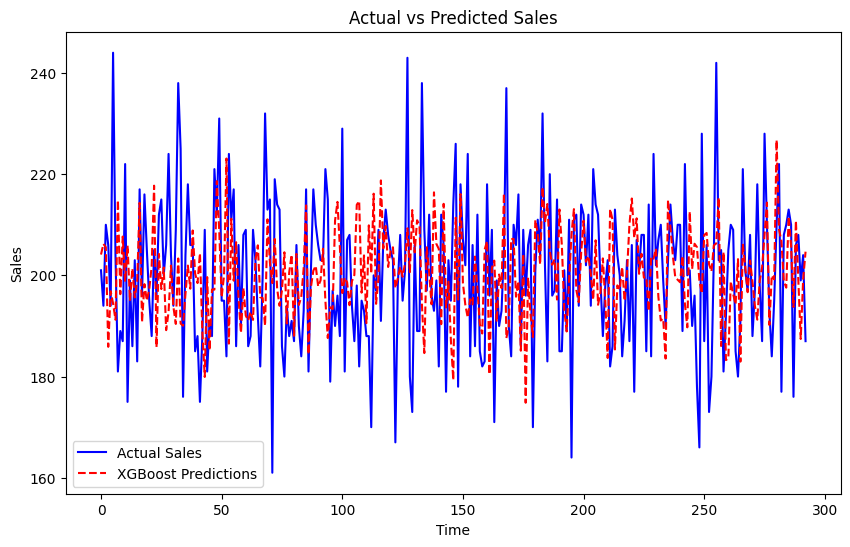

In [12]:
# Visualization (Optional)
plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='Actual Sales', color='blue')
plt.plot(y_pred_xgb, label='XGBoost Predictions', color='red', linestyle='--')
plt.xlabel('Time')
plt.ylabel('Sales')
plt.title('Actual vs Predicted Sales')
plt.legend()
plt.show()